In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 46.4 MB/s eta 0:00:00
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
import tensorflow as tf
print("tensorflow version :{}".format(tf.__version__))
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

tensorflow version :2.9.2
Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14069686614523338131
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14417788928
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17656004079117520723
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
#### physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import class_weight

In [ ]:

from keras.layers import Conv1D, Dense, Dropout, GlobalMaxPool1D, MaxPool1D
from keras.layers import TimeDistributed, LSTM, Bidirectional, Input, concatenate,RepeatVector
from keras import regularizers
# from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model, Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import plot_model, to_categorical
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from keras.regularizers import l1,l2


In [ ]:
data_path = '/content/drive/MyDrive/CAV/data/Instant attack/25/'

In [ ]:
sensor1_data = pd.read_csv(data_path + "Sensor1_values_instant_25.csv", index_col= 'Unnamed: 0')
sensor1_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
len(sensor1_data)

29800

In [ ]:
sensor1_label = pd.read_csv(data_path+"Ground_truth_instant_25_sensor1.csv", names=['Class'])
sensor1_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
len(sensor1_label)

29800

In [ ]:
sensor2_data = pd.read_csv(data_path + "Sensor2_values_instant_25.csv", index_col = "Unnamed: 0")
sensor2_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor2_label = pd.read_csv(data_path + "Ground_truth_instant_25_sensor2.csv",names=['Class'])
sensor2_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
sensor3_data = pd.read_csv(data_path + "Sensor3_values_instant_25.csv", index_col = "Unnamed: 0")
sensor3_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor3_label = pd.read_csv(data_path + "Ground_truth_instant_25_sensor3.csv", names=['Class'])
sensor3_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
sensor1_data['std_speed_5'] = sensor1_data['InVehicle_Longitudinal_Speed'].rolling(5, min_periods= 1, center= True).std()
sensor1_data['std_acc_5'] = sensor1_data['InVehicle_Longitudinal_Accel'].rolling(5, min_periods= 1, center= True).std()
sensor1_data['std_GPS_5'] = sensor1_data['GPS_Speed'].rolling(5, min_periods= 1, center= True).std()

In [ ]:
sensor1_data.columns

Index(['InVehicle_Longitudinal_Speed', 'GPS_Speed',
       'InVehicle_Longitudinal_Accel', 'std_speed_5', 'std_acc_5',
       'std_GPS_5'],
      dtype='object')

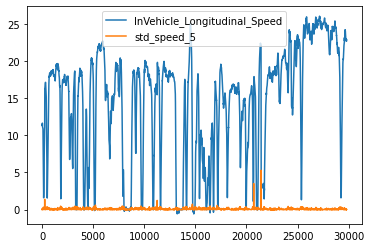

In [ ]:
sensor1_data[['InVehicle_Longitudinal_Speed','std_speed_5']].plot()

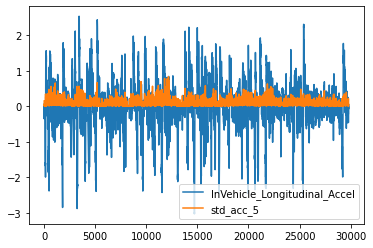

In [ ]:
sensor1_data[['InVehicle_Longitudinal_Accel','std_acc_5']].plot()

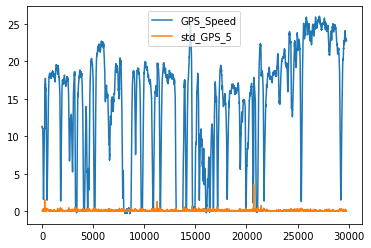

In [ ]:
sensor1_data[['GPS_Speed','std_GPS_5']].plot()

In [ ]:
sensor2_data['std_speed_5'] = sensor2_data['InVehicle_Longitudinal_Speed'].rolling(5, min_periods= 1, center= True).std()
sensor2_data['std_acc_5'] = sensor2_data['InVehicle_Longitudinal_Accel'].rolling(5, min_periods= 1, center= True).std()
sensor2_data['std_GPS_5'] = sensor2_data['GPS_Speed'].rolling(5, min_periods= 1, center= True).std()

In [ ]:
sensor2_data.columns

Index(['InVehicle_Longitudinal_Speed', 'GPS_Speed',
       'InVehicle_Longitudinal_Accel', 'std_speed_5', 'std_acc_5',
       'std_GPS_5'],
      dtype='object')

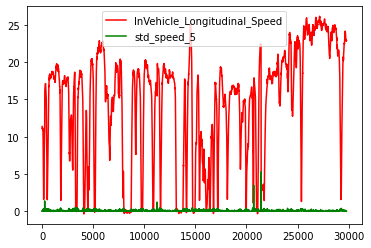

In [ ]:
sensor2_data[['InVehicle_Longitudinal_Speed','std_speed_5']].plot(color=['red', 'green'] )

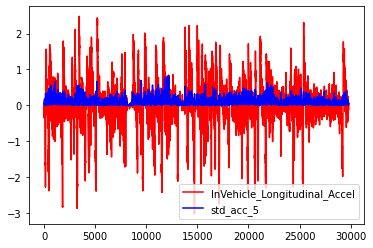

In [ ]:
sensor2_data[['InVehicle_Longitudinal_Accel','std_acc_5']].plot(color=['red', 'blue'] )

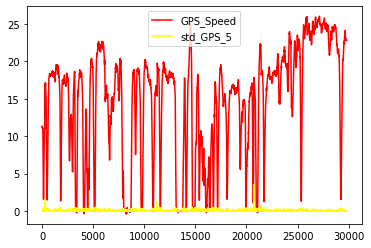

In [ ]:
sensor2_data[['GPS_Speed','std_GPS_5']].plot(color=['red', 'yellow'] )

In [ ]:
sensor3_data['std_speed_5'] = sensor3_data['InVehicle_Longitudinal_Speed'].rolling(5, min_periods= 1, center= True).std()
sensor3_data['std_acc_5'] = sensor3_data['InVehicle_Longitudinal_Accel'].rolling(5, min_periods= 1, center= True).std()
sensor3_data['std_GPS_5'] = sensor3_data['GPS_Speed'].rolling(5, min_periods= 1, center= True).std()

In [ ]:
sensor3_data.columns

Index(['InVehicle_Longitudinal_Speed', 'GPS_Speed',
       'InVehicle_Longitudinal_Accel', 'std_speed_5', 'std_acc_5',
       'std_GPS_5'],
      dtype='object')

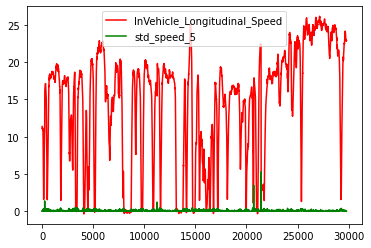

In [ ]:
sensor3_data[['InVehicle_Longitudinal_Speed','std_speed_5']].plot(color=['red', 'green'] )

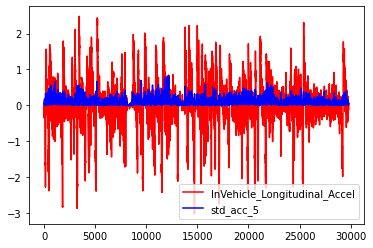

In [ ]:
sensor3_data[['InVehicle_Longitudinal_Accel','std_acc_5']].plot(color=['red', 'blue'] )

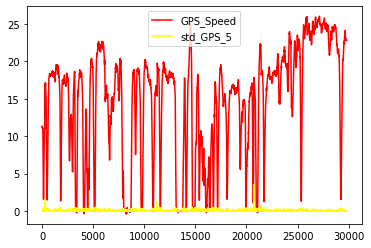

In [ ]:
sensor3_data[['GPS_Speed','std_GPS_5']].plot(color=['red', 'yellow'] )

In [ ]:
scaler  = StandardScaler()
scaler.fit(sensor1_data[['std_speed_5','std_GPS_5','std_acc_5']])
sensor1_data_normal = scaler.transform(sensor1_data[['std_speed_5','std_GPS_5','std_acc_5']]) 
sensor1_data_normal[:5]

array([[-0.57721227, -0.42674685,  0.77920952],
       [-0.57191982, -0.48390243,  0.66549642],
       [-0.56969878, -0.51987624,  0.54692016],
       [-0.59396944, -0.66913631,  0.6213872 ],
       [-0.60151234, -0.66509592, -0.84774737]])

In [ ]:
scaler  = StandardScaler()
scaler.fit(sensor2_data[['std_speed_5','std_GPS_5','std_acc_5']])
sensor2_data_normal = scaler.transform(sensor2_data[['std_speed_5','std_GPS_5','std_acc_5']]) 
sensor2_data_normal[:5]

array([[-0.57937438, -0.42353399,  0.78663982],
       [-0.57407373, -0.48062088,  0.6725265 ],
       [-0.57184924, -0.51655144,  0.5535329 ],
       [-0.59615755, -0.66563209,  0.62826203],
       [-0.60371215, -0.66159656, -0.84604324]])

In [ ]:
scaler  = StandardScaler()
scaler.fit(sensor3_data[['std_speed_5','std_GPS_5','std_acc_5']])
sensor3_data_normal = scaler.transform(sensor3_data[['std_speed_5','std_GPS_5','std_acc_5']]) 
sensor3_data_normal[:5]

array([[-0.57937438, -0.42353399,  0.78663982],
       [-0.57407373, -0.48062088,  0.6725265 ],
       [-0.57184924, -0.51655144,  0.5535329 ],
       [-0.59615755, -0.66563209,  0.62826203],
       [-0.60371215, -0.66159656, -0.84604324]])

In [ ]:
window_size = 10

# create windows with overlap
def convertToFrames(X_data,y_data, step):
    X, Y =[], []    
    for i in range(len(X_data)-step):
        y_or = 0
        d=i+step  
        X.append(X_data[i:d,])
        for y in y_data.iloc[i:d].values:
           y_or = y_or or y
        
        Y.append(y_or)
    return np.array(X), np.array(Y)

In [ ]:
X_sensor1, y_sensor1 = convertToFrames(sensor1_data_normal, sensor1_label, window_size)
X_sensor1.shape, y_sensor1.shape
# print(X_sensor1[0])
# print(X_sensor1[1])

((29790, 10, 3), (29790, 1))

In [ ]:
X_sensor2, y_sensor2 = convertToFrames(sensor2_data_normal, sensor2_label, window_size)
X_sensor2.shape, y_sensor2.shape

((29790, 10, 3), (29790, 1))

In [ ]:
X_sensor3, y_sensor3 = convertToFrames(sensor3_data_normal, sensor3_label, window_size)
X_sensor3.shape, y_sensor3.shape

((29790, 10, 3), (29790, 1))

In [ ]:
y_sensor1 = to_categorical(y_sensor1, num_classes= 2, dtype='float32')
X_train_sensor1,X_test_sensor1, y_train_sensor1, y_test_sensor1 = train_test_split(X_sensor1,y_sensor1,random_state = 1400, test_size= 0.15)
y_train_sensor1, y_test_sensor1 = y_train_sensor1.squeeze(), y_test_sensor1.squeeze()
X_train_sensor1.shape, X_test_sensor1.shape,y_train_sensor1.shape, y_test_sensor1.shape

((25321, 10, 3), (4469, 10, 3), (25321, 2), (4469, 2))

In [ ]:
y_sensor2 = to_categorical(y_sensor2, num_classes= 2, dtype='float32')
X_train_sensor2,X_test_sensor2, y_train_sensor2, y_test_sensor2 = train_test_split(X_sensor2,y_sensor2,random_state = 1400, test_size= 0.15)
y_train_sensor2, y_test_sensor2 = y_train_sensor2.squeeze(), y_test_sensor2.squeeze()
X_train_sensor2.shape, X_test_sensor2.shape,y_train_sensor2.shape, y_test_sensor2.shape

((25321, 10, 3), (4469, 10, 3), (25321, 2), (4469, 2))

In [ ]:
y_sensor3 = to_categorical(y_sensor3, num_classes= 2, dtype='float32')
X_train_sensor3,X_test_sensor3, y_train_sensor3, y_test_sensor3 = train_test_split(X_sensor3,y_sensor3,random_state = 1400, test_size= 0.15)
y_train_sensor3, y_test_sensor3 = y_train_sensor3.squeeze(), y_test_sensor3.squeeze()
X_train_sensor3.shape, X_test_sensor3.shape,y_train_sensor3.shape, y_test_sensor3.shape

((25321, 10, 3), (4469, 10, 3), (25321, 2), (4469, 2))

In [ ]:

def creatModel():
  
    model = Sequential()
    model.add(Conv1D(kernel_size=3, filters= 40, activation= 'relu', padding='same'))
    model.add(Dropout(0.1))
    model.add( Conv1D(kernel_size=3, filters= 60, activation= 'relu', padding='same'))
    model.add(Dropout(0.1))
    model.add(Conv1D(kernel_size=3, filters= 60, activation= 'relu', padding='same'))
    model.add(Dropout(0.1))
    model.add(GlobalMaxPool1D())
    model.add(RepeatVector(X_train_sensor1.shape[1]))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(rate=0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(rate=0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(rate=0.2))
    model.add((Dense(32)))
    model.add((Dense(16)))
    model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2()))
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

    return model


In [ ]:
import time

class TimeHistory(Callback):
  
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        epoch_time = time.time() - self.epoch_time_start
        logs['epoch_time'] = epoch_time


In [ ]:
model_path = '/content/drive/MyDrive/CAV/data/Instant attack/25/Models/Models28-1/'

class Model_save(Callback):
  def on_epoch_end(self, epoch, logs={}):
    self.model.save(model_path + "CNN-LSTM-autoEncoder-Instant-25-CAV-perEpoch_{}.h5".format(sensor))
    

In [ ]:
def setCallbacks(sensor):

  best_model_path = model_path + 'Best_CNN-LSTM-autoEncoder-Instant-25-CAV_{}.h5'.format(sensor)
  checkpoint = ModelCheckpoint(best_model_path, monitor='val_loss', save_best_only=True, mode='min')

  history_cb = tf.keras.callbacks.CSVLogger(model_path + 'historyLOG_Instant-25_{}.csv'.format(sensor), separator=",", append=True)

  model_save = Model_save()

  Estop = EarlyStopping(monitor='val_accuracy', patience= 100)
  
  return model_save, checkpoint, history_cb, Estop

In [ ]:
sensor = "sensor1"
time_callback = TimeHistory()
model_sensor1 = creatModel()
model_save, checkpoint, history_cb, Estop = setCallbacks("sensor1")
history_sensor1 = model_sensor1.fit(X_train_sensor1, y_train_sensor1,
                                    batch_size = 128, epochs = 500,
                                    validation_split = 0.1,
                                    verbose = 1,
                                    callbacks = [time_callback, model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)#


Epoch 1/500
179/179 [==============================] - 28s 19ms/step - loss: 0.4762 - accuracy: 0.8335 - val_loss: 0.4686 - val_accuracy: 0.8350 - epoch_time: 27.5478
Epoch 2/500
179/179 [==============================] - 3s 15ms/step - loss: 0.4071 - accuracy: 0.8456 - val_loss: 0.3483 - val_accuracy: 0.8666 - epoch_time: 2.4459
Epoch 3/500
179/179 [==============================] - 3s 17ms/step - loss: 0.3023 - accuracy: 0.8942 - val_loss: 0.2314 - val_accuracy: 0.9183 - epoch_time: 2.7720
Epoch 4/500
179/179 [==============================] - 2s 13ms/step - loss: 0.2337 - accuracy: 0.9221 - val_loss: 0.1777 - val_accuracy: 0.9447 - epoch_time: 2.0635
Epoch 5/500
179/179 [==============================] - 2s 13ms/step - loss: 0.1961 - accuracy: 0.9386 - val_loss: 0.1605 - val_accuracy: 0.9499 - epoch_time: 2.0864
Epoch 6/500
179/179 [==============================] - 2s 13ms/step - loss: 0.1734 - accuracy: 0.9448 - val_loss: 0.1438 - val_accuracy: 0.9621 - epoch_time: 2.0618
Epoch 7/

In [ ]:
print(model_sensor1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 40)            400       
                                                                 
 dropout (Dropout)           (None, 10, 40)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 60)            7260      
                                                                 
 dropout_1 (Dropout)         (None, 10, 60)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 60)            10860     
                                                                 
 dropout_2 (Dropout)         (None, 10, 60)            0         
                                                                 
 global_max_pooling1d (Globa  (None, 60)               0

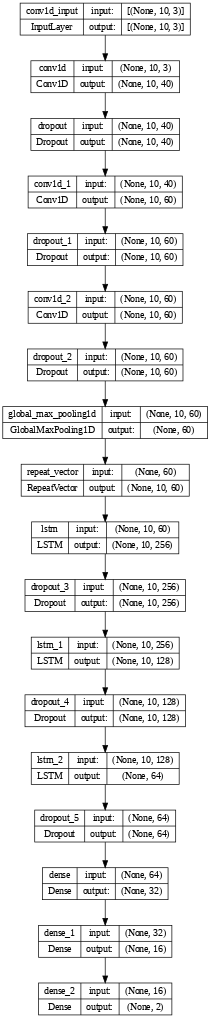

In [ ]:
plot_model(model= model_sensor1, show_shapes= True, dpi=50)

In [ ]:
sensor = "sensor2"
time_callback = TimeHistory()
model_sensor2 = creatModel()
model_save, checkpoint, history_cb, Estop = setCallbacks("sensor2")
history_sensor2 = model_sensor2.fit(X_train_sensor2, y_train_sensor2,
                                    batch_size = 128, epochs = 500,
                                    validation_split = 0.1,
                                    verbose = 1,
                                    callbacks = [time_callback, model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)#

Epoch 1/500
179/179 [==============================] - 9s 19ms/step - loss: 0.4053 - accuracy: 0.8597 - val_loss: 0.3037 - val_accuracy: 0.9080 - epoch_time: 9.0618
Epoch 2/500
179/179 [==============================] - 2s 13ms/step - loss: 0.2940 - accuracy: 0.9061 - val_loss: 0.2739 - val_accuracy: 0.9187 - epoch_time: 2.1981
Epoch 3/500
179/179 [==============================] - 3s 18ms/step - loss: 0.2465 - accuracy: 0.9195 - val_loss: 0.2117 - val_accuracy: 0.9337 - epoch_time: 2.9329
Epoch 4/500
179/179 [==============================] - 3s 15ms/step - loss: 0.2175 - accuracy: 0.9317 - val_loss: 0.1856 - val_accuracy: 0.9487 - epoch_time: 2.5831
Epoch 5/500
179/179 [==============================] - 2s 14ms/step - loss: 0.1916 - accuracy: 0.9403 - val_loss: 0.1780 - val_accuracy: 0.9507 - epoch_time: 2.2683
Epoch 6/500
179/179 [==============================] - 2s 14ms/step - loss: 0.1786 - accuracy: 0.9468 - val_loss: 0.1550 - val_accuracy: 0.9550 - epoch_time: 2.2467
Epoch 7/50

In [ ]:
sensor = "sensor3"
time_callback = TimeHistory()
model_sensor3 = creatModel()
model_save, checkpoint, history_cb, Estop = setCallbacks("sensor3")
history_sensor3 = model_sensor3.fit(X_train_sensor3, y_train_sensor3,
                                    batch_size = 128, epochs = 500,
                                    validation_split = 0.1,
                                    verbose = 1,
                                    callbacks = [time_callback, model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)#

Epoch 1/500
179/179 [==============================] - 9s 18ms/step - loss: 0.4602 - accuracy: 0.8437 - val_loss: 0.4374 - val_accuracy: 0.8500 - epoch_time: 8.3290
Epoch 2/500
179/179 [==============================] - 2s 13ms/step - loss: 0.4379 - accuracy: 0.8464 - val_loss: 0.4315 - val_accuracy: 0.8500 - epoch_time: 2.0577
Epoch 3/500
179/179 [==============================] - 2s 13ms/step - loss: 0.4313 - accuracy: 0.8464 - val_loss: 0.4174 - val_accuracy: 0.8500 - epoch_time: 2.1888
Epoch 4/500
179/179 [==============================] - 3s 17ms/step - loss: 0.4240 - accuracy: 0.8464 - val_loss: 0.4097 - val_accuracy: 0.8500 - epoch_time: 2.8169
Epoch 5/500
179/179 [==============================] - 2s 13ms/step - loss: 0.4093 - accuracy: 0.8474 - val_loss: 0.3835 - val_accuracy: 0.8595 - epoch_time: 2.0928
Epoch 6/500
179/179 [==============================] - 2s 12ms/step - loss: 0.3876 - accuracy: 0.8594 - val_loss: 0.3749 - val_accuracy: 0.8677 - epoch_time: 2.0213
Epoch 7/50

In [ ]:
#plot history of model_sensor1
history_sensor1 = pd.read_csv(model_path +"historyLOG_Instant-25_sensor1.csv", index_col='epoch')
history_sensor1.reset_index(drop= True, inplace= True)
history_sensor1.head()
print('Average Exe_time for sensor1: {} sec.'.format(round(np.mean(history_sensor1['epoch_time'].values),3)))


Average Exe_time for sensor1: 2.477 sec.


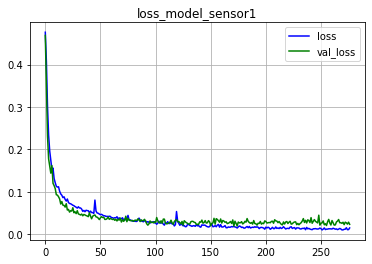

In [ ]:
plt.plot( history_sensor1['loss'], 'b',label = 'loss')
plt.plot( history_sensor1['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor1')
plt.show()

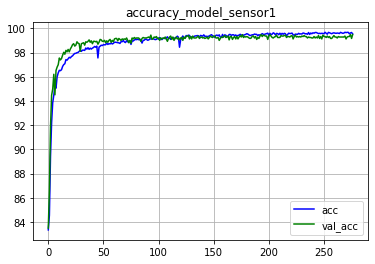

In [ ]:
plt.plot(history_sensor1['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor1['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor1')
plt.show()

In [ ]:
history_sensor2 = pd.read_csv(model_path +"historyLOG_Instant-25_sensor2.csv", index_col='epoch')
history_sensor2.reset_index(drop= True, inplace= True)
history_sensor2.head()
print('Average Exe_time for sensor2: {} sec.'.format(round(np.mean(history_sensor2['epoch_time'].values),3)))


Average Exe_time for sensor2: 2.407 sec.


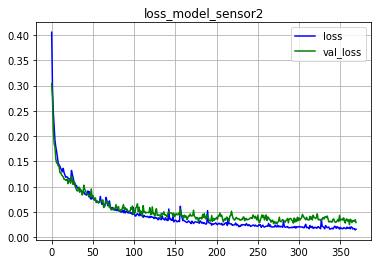

In [ ]:
plt.plot( history_sensor2['loss'], 'b',label = 'loss')
plt.plot( history_sensor2['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor2')
plt.show()

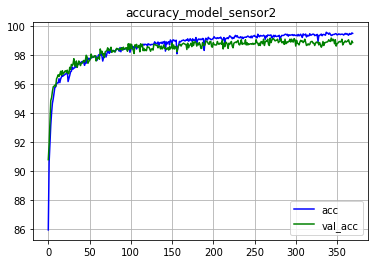

In [ ]:
plt.plot(history_sensor2['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor2['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor2')
plt.show()

In [ ]:
history_sensor3 = pd.read_csv(model_path +"historyLOG_Instant-25_sensor3.csv", index_col='epoch')
history_sensor3.reset_index(drop= True, inplace= True)
history_sensor3.head()
print('Average Exe_time for sensor3: {} sec.'.format(round(np.mean(history_sensor3['epoch_time'].values),3)))


Average Exe_time for sensor3: 2.401 sec.


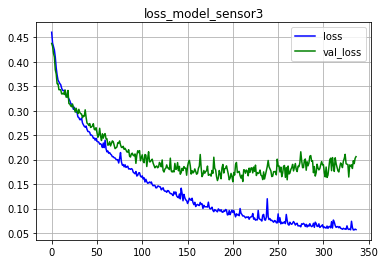

In [ ]:
plt.plot( history_sensor3['loss'], 'b',label = 'loss')
plt.plot( history_sensor3['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor3')
plt.show()

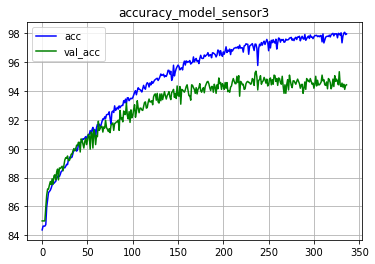

In [ ]:
plt.plot(history_sensor3['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor3['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor3')
plt.show()

In [ ]:
#last model_sensor1 evaluation
test_loss, test_acc = model_sensor1.evaluate( X_test_sensor1, y_test_sensor1, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

140/140 [==============================] - 1s 5ms/step - loss: 0.0228 - accuracy: 0.9949
test accuracy :99.5% 
 test loss :0.0228


In [ ]:
#last model_sensor2 evaluation
test_loss, test_acc = model_sensor2.evaluate( X_test_sensor2, y_test_sensor2, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

140/140 [==============================] - 1s 5ms/step - loss: 0.0393 - accuracy: 0.9899
test accuracy :99.0% 
 test loss :0.0393


In [ ]:
#last model_sensor3 evaluation
test_loss, test_acc = model_sensor3.evaluate( X_test_sensor3, y_test_sensor3, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

140/140 [==============================] - 1s 5ms/step - loss: 0.1729 - accuracy: 0.9519
test accuracy :95.2% 
 test loss :0.173


In [ ]:
y_pred_sensor1 = model_sensor1.predict( X_test_sensor1, verbose= 1)
y_pred_sensor2 = model_sensor2.predict( X_test_sensor2, verbose= 1)
y_pred_sensor3 = model_sensor3.predict( X_test_sensor3, verbose= 1)

140/140 [==============================] - 2s 6ms/step


In [ ]:
y_pred_sensor1 = [np.argmax(i) for i in y_pred_sensor1]
y_pred_sensor2 = [np.argmax(i) for i in y_pred_sensor2]
y_pred_sensor3 = [np.argmax(i) for i in y_pred_sensor3]

In [ ]:
y_pred_total = []
for i in range(len(y_pred_sensor1)):
  y_pred_total.append( y_pred_sensor1[i] or y_pred_sensor2[i] or y_pred_sensor3[i])

In [ ]:
assert(len(y_pred_total) == len(y_pred_sensor1))

In [ ]:
y_test_sensor1 = [np.argmax(i) for i in y_test_sensor1]
y_test_sensor2 = [np.argmax(i) for i in y_test_sensor2]
y_test_sensor3 = [np.argmax(i) for i in y_test_sensor3]

In [ ]:
y_test_total = []
for i in range(len(y_test_sensor1)):
  y_test_total.append(y_test_sensor1[i] or y_test_sensor2[i] or y_test_sensor3[i])

In [ ]:
print("Sensor 1 performanace:")
recall = recall_score(y_test_sensor1, y_pred_sensor1, average='micro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor1, y_pred_sensor1, average='micro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor1, y_pred_sensor1, average='micro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor1, y_pred_sensor1)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 1 performanace:
recall score : 99.49%

precision score: 99.49%

F1 score: 99.49%

accuracy score: 99.49%



In [ ]:
print("Sensor 2 performanace:")
recall = recall_score(y_test_sensor2, y_pred_sensor2, average='micro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor2, y_pred_sensor2, average='micro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor2, y_pred_sensor2, average='micro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor2, y_pred_sensor2)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 2 performanace:
recall score : 98.99%

precision score: 98.99%

F1 score: 98.99%

accuracy score: 98.99%



In [ ]:
print("Sensor 3 performanace:")
recall = recall_score(y_test_sensor3, y_pred_sensor3, average='micro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor3, y_pred_sensor3, average='micro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor3, y_pred_sensor3, average='micro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor3, y_pred_sensor3)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 3 performanace:
recall score : 95.19%

precision score: 95.19%

F1 score: 95.19%

accuracy score: 95.19%



In [ ]:
print("All Sensors performanace:\n")

recall = recall_score(y_test_total, y_pred_total, average='micro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_total, y_pred_total, average='micro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_total, y_pred_total, average='micro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_total, y_pred_total)
print("accuracy score: {:.2%}\n".format(accuracy))

All Sensors performanace:

recall score : 95.30%

precision score: 95.30%

F1 score: 95.30%

accuracy score: 95.30%



In [ ]:
print("All Sensors performanace:\n")

recall = recall_score(y_test_total, y_pred_total, average='macro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_total, y_pred_total, average='macro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_total, y_pred_total, average='macro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_total, y_pred_total)
print("accuracy score: {:.2%}\n".format(accuracy))

All Sensors performanace:

recall score : 94.82%

precision score: 95.46%

F1 score: 95.11%

accuracy score: 95.30%



In [ ]:
conf = confusion_matrix(y_test_total, y_pred_total, labels=[1,0])
conf_df = pd.DataFrame(conf, columns= [1,0], index= [1,0])
conf_df

,1,0
1,1684,143
0,67,2575
